In [10]:
#import necessary files 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#set random seed as 0 
np.random.seed(0)
import seaborn as sns



In [5]:
# load the dataset 
data = pd.read_csv('Data\wholesale_customers_data.csv')
data.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [6]:
#create a new variable called channels and store the channel column there
channels = data['Channel']
df = data.drop(columns=['Channel','Region'], axis = 1)
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)


In [8]:
#import Kmeans
from sklearn.cluster import KMeans

#create an instance of it and set 2 clusters
k_means = KMeans(n_clusters=2, random_state=42)

#fit the model to the data
k_means.fit(df_scaled)

#get the predictions and store to cluster_preds
cluster_preds = k_means.predict(df_scaled)


In [11]:
#use calinski_harabasz to check performance
from sklearn.metrics import calinski_harabasz_score, adjusted_rand_score

In [12]:
#get the variance ratio
calinski_harabasz_score(df, cluster_preds)

np.float64(134.5309447521087)

In [13]:
##use the adjusted rand score to compare two clusterings
#between the predicted clusters and the channels
adjusted_rand_score(channels, cluster_preds)

-0.04737836290810828

A score close to 0 means that predictions are essentiallt random, while a score lose to -1 means that the predictions are pathologically bad, worse than random chance.

A score such as above, -0.047 suggests that the clusterings were essentially no better than random chance 

Incorporate PCA 

In [14]:
#import PCA 
from sklearn.decomposition import PCA

#create an instance of PCA
pca = PCA(n_components=4)
#use the fit_transform method to transform the data
pca_df = pca.fit_transform(df_scaled)



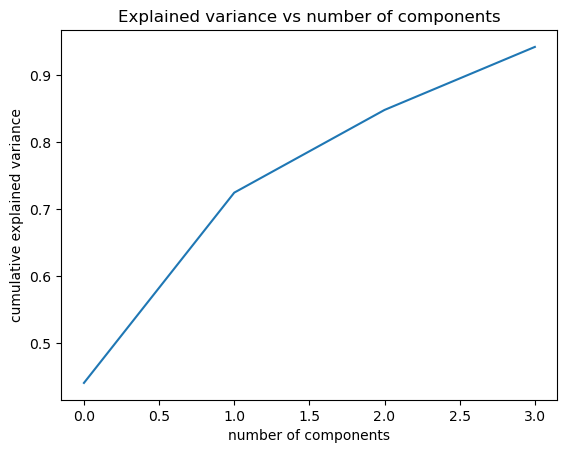

In [15]:
np.cumsum(pca.explained_variance_ratio_)
#plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.title('Explained variance vs number of components')
plt.show()
    

In [17]:
pca_kmeans = KMeans(n_clusters=2, random_state=42)
pca_kmeans.fit(pca_df)
pca_preds = pca_kmeans.predict(pca_df)
calinski_harabasz_score(pca_df, pca_preds)
adjusted_rand_score(channels, pca_preds)



0.2352296191368906

In [ ]:
# The highest ARS is ~0.23, which suggests that the clusters are better than random chance, 
# but far from perfect.  Overall, the quality of the clustering algorithm did a lot better than the 
# first algorithm we ran on unscaled data. The best performance was achieved when reducing the 
# number of principal components down to 4. The increase in model performance is likely due to the 
# reduction in dimensionality. Although dropping the last 2 PCs means that we lose about 6% of 
# our explained variance, this proved to be a net-positive trade-off for the reduction in dimensionality 
# it provided.